### Clustering Assignment

HELP International – an international humanitarian NGO helps the people of backward countries at the time of disaster and natural calamities. They have collected around $10 million from their recent funding programme. They want to use this money effectively. The CEO of the company has to be provided with the top 5 countries that are in dire need of help. <br>


As a Data Analyst, we have to come up with the names of the 5 countries that are in need of help from the NGO company.
Based on the criteria - countries that have low GDPP, low income and high child mortality rate, the fund has to be distributed to fulfill their requirements. <br>

Using K-Means and Hierarchical clustering (single and complete linkage), we can cluster the countries based on the selected criteria and accomplish this task in an easier way.

### Steps involved: <br>
    1. Reading and understanding the data
    2. Exploratory Data Analysis
            a. Univariate and Bivariate Analysis
            b. Outlier Treatment
    3. Scaling
    4. Hopkins Statistics
    5. K-Means clustering
            a. Elbow-curve/SSD
            b. Silhouette Score
            c. Clustering
            d. Profiling
            e. Visualisation
    6. Hierarchical clustering
            a. Single Linkage
            b. Complete Linkage
            c. Clustering
            d. Profiling
            e. Visualisation
    7. Recommendations

### 1. Reading and understanding the data

Importing the necessary libaries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# K-Means Algorithm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Loading the csv file into `country_df` dataframe

In [2]:
country_df = pd.read_csv('E:/GIT_Repository/Python/COURSE_2/Machine_Learning/Clustering_Assignment/Country-data.csv')
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
# Checking the shape
country_df.shape

(167, 10)

In [4]:
# Details of the dataframe
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Checking for null values

In [5]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

***OBSERVATION*** - There is no null values in any of the columns

#### The columns exports, health and imports are percenage of the GDP per capita. Converting them into actual values

In [6]:
country_df['exports'] = (country_df['exports']/100)* country_df['gdpp']
country_df['health'] = round((country_df['health']/100)* country_df['gdpp'],2)
country_df['imports'] = round((country_df['imports']/100)* country_df['gdpp'],2)
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2    55.30   41.92   248.30    1610   
1              Albania        16.6  1145.20  267.90  1987.74    9930   
2              Algeria        27.3  1712.64  185.98  1400.44   12900   
3               Angola       119.0  2199.19  100.60  1514.37    5900   
4  Antigua and Barbuda        10.3  5551.00  735.66  7185.80   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

#### Statistical Summary of the dataframe

In [7]:
country_df.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.732934    6588.352096   17144.688623   
std     40.328931   17973.885795  1801.409031   14710.810423   19278.067698   
min      2.600000       1.076920    12.820000       0.650000     609.000000   
25%      8.250000     447.140000    78.535000     640.215000    3355.000000   
50%     19.300000    1777.440000   321.890000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

### 2. Exploratory Data Analysis

#### Univariate Analysis

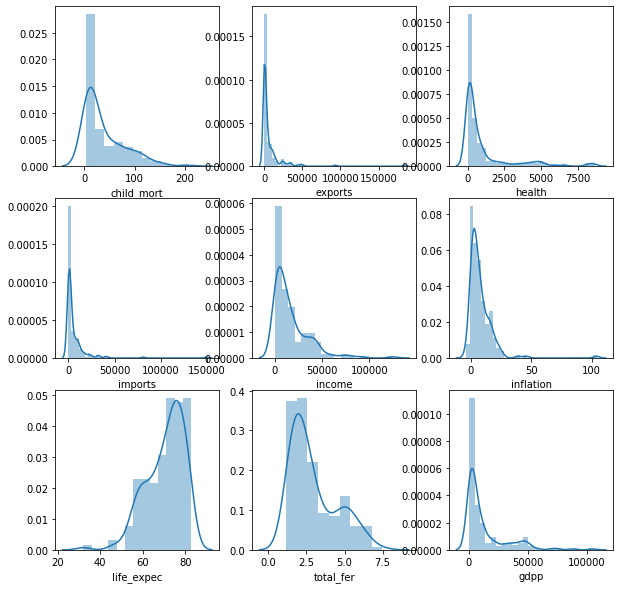

In [8]:
plt.figure(figsize = (10,10))
f = country_df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_df[i[1]])

***OBSERVATION*** - From the dist plot, we can say that few columns in the dataframe are normally distributed and few columns are skewed.

#### Bivariate Analysis

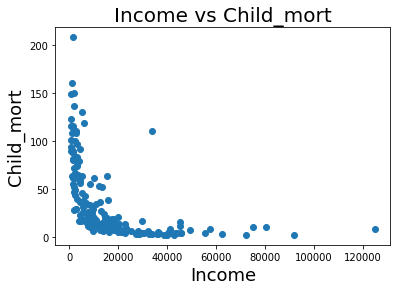

In [9]:
plt.scatter(country_df.income,country_df.child_mort)
plt.title("Income vs Child_mort", fontsize=20)
plt.xlabel("Income", fontsize=18)
plt.ylabel("Child_mort", fontsize=18)
plt.show()

***OBSERVATION*** - From the scatter plot, we can say that Child_mort is much higher when the income is very low and the child mortality gets decreasing as the income increases.

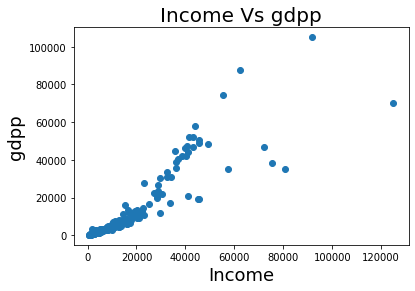

In [10]:
plt.scatter(country_df.income,country_df.gdpp)
plt.title("Income Vs gdpp", fontsize=20)
plt.xlabel("Income", fontsize=18)
plt.ylabel("gdpp", fontsize=18)
plt.show()

***OBSERVATION*** - From the scatter plot, we can say that gdpp is low  when the income is low. Gdpp increases when the income is high.

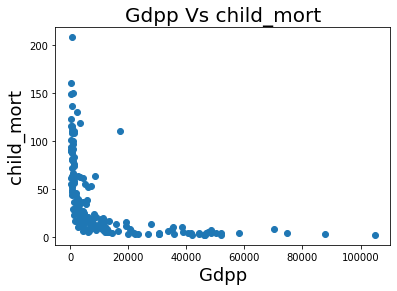

In [11]:
plt.scatter(country_df.gdpp,country_df.child_mort)
plt.title("Gdpp Vs child_mort", fontsize=20)
plt.xlabel("Gdpp", fontsize=18)
plt.ylabel("child_mort", fontsize=18)
plt.show()

***OBSERVATION*** - From the scatter plot, we can say that child mortality is high when the Gdpp is low.

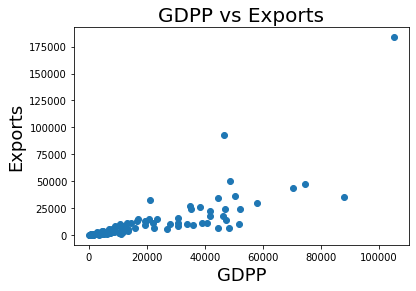

In [12]:
plt.scatter(country_df.gdpp,country_df.exports)
plt.title("GDPP vs Exports", fontsize=20)
plt.xlabel("GDPP", fontsize=18)
plt.ylabel("Exports", fontsize=18)
plt.show()

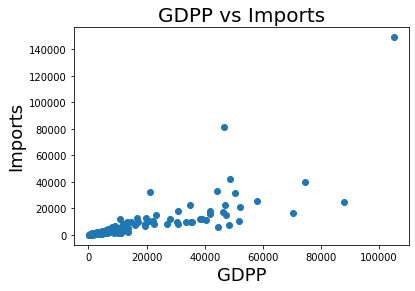

In [13]:
plt.scatter(country_df.gdpp,country_df.imports)
plt.title("GDPP vs Imports", fontsize=20)
plt.xlabel("GDPP", fontsize=18)
plt.ylabel("Imports", fontsize=18)
plt.show()

***OBSERVATION*** - From the scatter plot, it is clearly seen that exports and import are high for the countries whose GDDP is high

### Aim:  
From the Bivariate Analysis, we came to know that countries which have **less inome and less Gdpp** have **higher child_mort**. By using clustering algortihm, we have to identify such countries which are in need of immediate financial assistance.

Let us construct the **Boxplot** to identify the spread of data and to remove the outliers

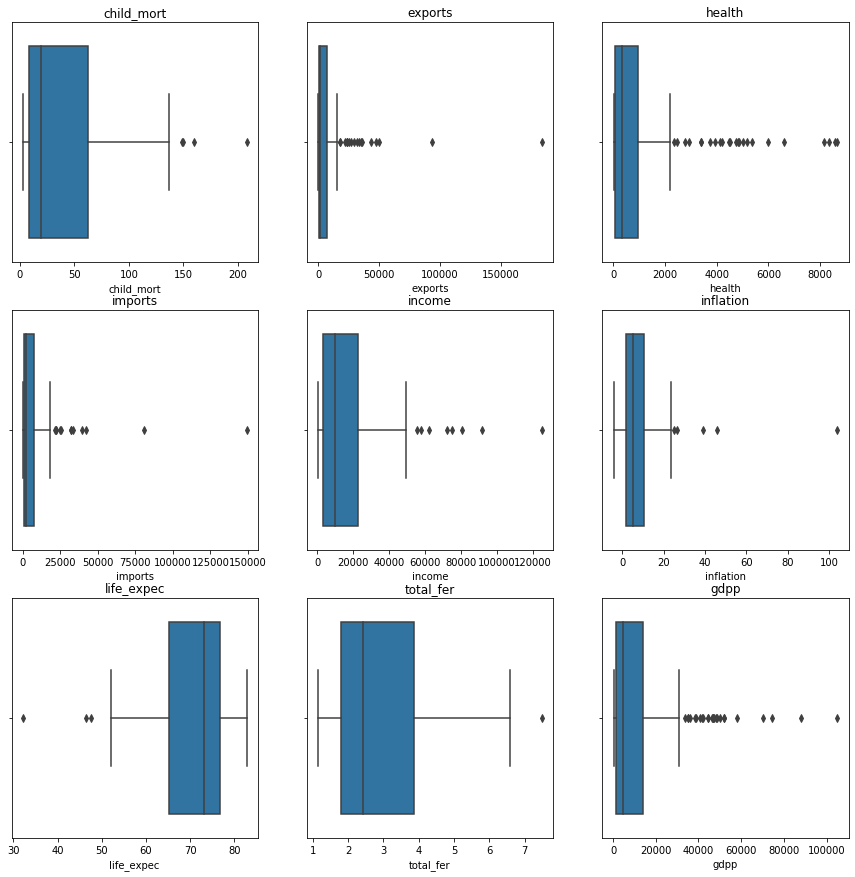

In [14]:
f = country_df.columns[1:]
plt.figure(figsize = (15,15))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1).set_title(format(i[1]))    
    sns.boxplot(country_df[i[1]])

### Observation

Our aim is to identify the countries (under-developed and in poverty) that need help from **HELP International**, a NGO company. We need to concentrate on the below factors.
    1. Child_mort - focus on countries that have high child_mort
    2. Income -  focus on countries that have low income
    3. Gdpp - focus on countries that have low gdpp rate
    4. Inflation - focus on countries that have high inflation
    5. Exports, Health, Imports, Life_expectation, total_fertility - focus on countries that are low in these factors.
    

In [15]:
country_df.describe([0.02,0.05,0.25,0.50,0.75,0.99])

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.732934    6588.352096   17144.688623   
std     40.328931   17973.885795  1801.409031   14710.810423   19278.067698   
min      2.600000       1.076920    12.820000       0.650000     609.000000   
2%       3.000000      53.483040    18.440000     124.420400     837.680000   
5%       3.460000      70.468800    26.716000     169.281000    1213.000000   
25%      8.250000     447.140000    78.535000     640.215000    3355.000000   
50%     19.300000    1777.440000   321.890000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
99%    153.400000   64794.260000  8410.330400   55371.390000   84374.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
2%      -1.288240   52.352000    1.282800     364.320000  
5%       0.183400   55.780000    1.390000     465.900000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

#### Outlier Treatment

For the features **'Child_mort'** and **'Inflation'**, we need to focus on the higher range of values (Countries with high child mortal rate and high Inflation are in risks). So, we can cap the **lower range of values** to treat the outliers. 

In [16]:
j = ['child_mort','inflation']
for i in j:
    q1 = round(country_df[i].quantile(0.02) ,2)
    country_df[i][country_df[i]<=q1] = q1

For the other features **'exports', 'imports', 'health', 'income', 'gdpp' and 'total_fer'**, we need to focus on the lower range of values (countries that are low in exports, imports, health rate, income, gdpp and total_fertility rate are in high risks). So we can cap the **high range of values** to treat the outliers. 

In [17]:
j = ['exports','imports','health','income','gdpp','total_fer']
for i in j:
    q3 = round(country_df[i].quantile(0.99),2)
    country_df[i] = country_df[i].apply(lambda x: q3 if x>=q3 else x) 

Now, we have capped the outliers as per our requirement. Let us now look into the statistical summary to cross verify.

In [18]:
country_df.describe([0.02,0.05,0.25,0.50,0.75,0.99])

child_mort       exports       health       imports        income  \
count  167.000000    167.000000   167.000000    167.000000    167.000000   
mean    38.274850   6538.214776  1054.206347   5873.135210  16857.550898   
std     40.324698  11415.308590  1790.845449   9422.700877  17957.012855   
min      3.000000      1.076920    12.820000      0.650000    609.000000   
2%       3.000000     53.483040    18.440000    124.420400    837.680000   
5%       3.460000     70.468800    26.716000    169.281000   1213.000000   
25%      8.250000    447.140000    78.535000    640.215000   3355.000000   
50%     19.300000   1777.440000   321.890000   2045.580000   9960.000000   
75%     62.100000   7278.000000   976.940000   7719.600000  22800.000000   
99%    153.400000  55136.308400  8352.982600  46629.102600  81883.160000   
max    208.000000  64794.260000  8410.330000  55371.390000  84374.000000   

        inflation  life_expec   total_fer          gdpp  
count  167.000000  167.000000  167.000000    167.000000  
mean     7.815365   70.555689    2.942216  12756.826347  
std     10.538046    8.893172    1.498235  17430.208938  
min     -1.290000   32.100000    1.150000    231.000000  
2%      -1.193040   52.352000    1.282800    364.320000  
5%       0.183400   55.780000    1.390000    465.900000  
25%      1.810000   65.300000    1.795000   1330.000000  
50%      5.390000   73.100000    2.410000   4660.000000  
75%     10.750000   76.800000    3.880000  14050.000000  
99%     41.478000   82.370000    6.553400  76125.920000  
max    104.000000   82.800000    6.560000  79088.000000

**Observation** <br>

1. The minimum value for Child_mort is 2.600000 before capping. After capping, it is 3.000000. The maximum value remains same as 208 before and after capping <br>
2. The minimum value for inflation is -4.21 before capping. After capping, it is -1.29. The maximum value remains same as 104 before and after capping <br>
3. For the other features 'exports', 'imports', 'health', 'income', 'gdpp' and 'total_fer', the maximum value has been capped and the minimum value remains the same.

### 3. Scaling

Now, we need to scale the data to same units. We can use either **StandardScaler** or **minmax** scaling. Here, we use StandardScaler. This Standardisation brings all the data into a standard normal distribution with mean 0 and standard deviation 1. <br>

For the purpose of scaling, we need only the numerical columns. So, we can exclude the `country` feature from the dataframe.

In [19]:
country_scale = country_df.iloc[0:, 1:]
country_scale.head()

child_mort  exports  health  imports   income  inflation  life_expec  \
0        90.2    55.30   41.92   248.30   1610.0       9.44        56.2   
1        16.6  1145.20  267.90  1987.74   9930.0       4.49        76.3   
2        27.3  1712.64  185.98  1400.44  12900.0      16.10        76.5   
3       119.0  2199.19  100.60  1514.37   5900.0      22.40        60.1   
4        10.3  5551.00  735.66  7185.80  19100.0       1.44        76.8   

   total_fer     gdpp  
0       5.82    553.0  
1       1.65   4090.0  
2       2.89   4460.0  
3       6.16   3530.0  
4       2.13  12200.0

Now, applying **StandardScaler** to the dataframe `country_scale` (without country column)

In [20]:
scaling = StandardScaler() 
country_scale_df =  scaling.fit_transform(country_scale)
country_scale_df = pd.DataFrame(country_scale_df)
country_scale_df.columns = country_scale.columns
country_scale_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291549 -0.569622 -0.566956 -0.598740 -0.851668   0.154632   -1.619092   
1   -0.539125 -0.473858 -0.440390 -0.413584 -0.386946  -0.316507    0.647866   
2   -0.272981 -0.424000 -0.486272 -0.476100 -0.221053   0.788529    0.670423   
3    2.007899 -0.381249 -0.534091 -0.463973 -0.612045   1.388160   -1.179234   
4   -0.695826 -0.086742 -0.178410  0.139728  0.125254  -0.606805    0.704258   

   total_fer      gdpp  
0   1.926560 -0.702259  
1  -0.865086 -0.498726  
2  -0.034956 -0.477434  
3   2.154176 -0.530950  
4  -0.543745 -0.032042

Before running the K-Means or Hierachical cluster algorithm, we need to check the Hopkins Statistics for the dataset.

### 4. Hopkins Statistics 

**Hopkins Statistics** - It is a way of measuring the cluster tendency of a dataset. Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space. The datapoints have to be clustered properly. The value of Hopkins Statistics ranges from 0 to 1. If we get the Hopkins Statistics nearing 1 (say greater than 0.8), the dataset has good tendency to form clusters.

In [21]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
import pandas as pd
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(country_scale_df)

0.8788027058499773

The **Hopkins statistics** which we got here is **greater than 0.80**. So we can conclude that, our dataset has the tendency to form the clusters in  a better way. <br>
**Note** - We need to run the Hopkins statistics multiple times and check that the value should not go down. It should oscillate above 0.80. The above code has been executed for **5 times** and got the Hopkins statistics as 0.91,0.92,0.88,0.92,0.93

### 5. K-Means Clustering

Now, Our task is to find the optimal value of K. For that, we use **Elbow-curve/SSD and Silhouette score**. <br>

**Elbow-curve/SSD** - Calculating the sum of squared distances of samples to their closest cluster center. 


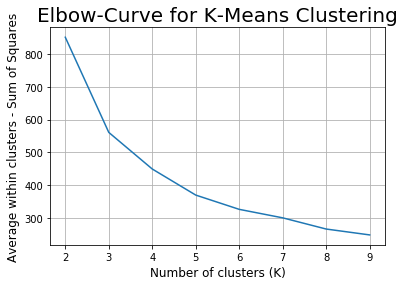

In [23]:
# elbow-curve/SSD
ssd = []  
for num_clusters in range(2,10):
    #print(num_clusters)
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scale_df)
    #print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
#print(ssd)
plt.title("Elbow-Curve for K-Means Clustering",fontsize = 20)
xvals = np.arange(2, 10, 1)
plt.plot(xvals,ssd)
plt.xlabel("Number of clusters (K)",fontsize = 12)
plt.ylabel("Average within clusters - Sum of Squares",fontsize = 12)
plt.grid(True)
plt.show()

We can choose the optimal value to be K = 3 after that there is not much significant change in the sum of squared values.

Let us check the **Silhouette Score**. 

**Silhouette Score** - This is used to analyse the distance between the clusters (dissimilarity) and also, the distance between the datapoints within the clusters (minimum).  <br>

If Silhouette Score = 1 -- Means the clusters are far away from each other. <br>
If Silhouette Score = 0 -- Means the clusters are very close to each other. <br>
If Silhouette Score < 0 -- Means that the datapoints has been assigned to the wrong clusters. <br>

n_clusters: 2
For n_clusters=2, the silhouette score is 0.4786200047511138
n_clusters: 3
For n_clusters=3, the silhouette score is 0.4234398661934899
n_clusters: 4
For n_clusters=4, the silhouette score is 0.4093086741810001
n_clusters: 5
For n_clusters=5, the silhouette score is 0.41566870897404046
n_clusters: 6
For n_clusters=6, the silhouette score is 0.316905328012758
n_clusters: 7
For n_clusters=7, the silhouette score is 0.2720283782419964
n_clusters: 8
For n_clusters=8, the silhouette score is 0.31923665695202985
n_clusters: 9
For n_clusters=9, the silhouette score is 0.30987598730530436


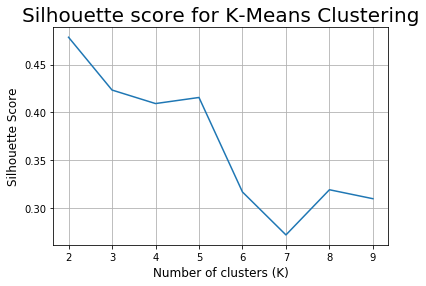

In [24]:
#Silhouette Score
sil = []
for num_clusters in range(2,10):
    print("n_clusters:",num_clusters)
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scale_df)
    
    cluster_labels = kmeans.labels_
    #print("cluster_labels:",kmeans.labels_)

    # silhouette score
    silhouette_avg = silhouette_score(country_scale_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    sil.append(silhouette_avg)
    
plt.title("Silhouette score for K-Means Clustering",fontsize = 20)
xvals = np.arange(2, 10, 1)
plt.plot(xvals,sil)
plt.xlabel("Number of clusters (K)",fontsize = 12)
plt.ylabel("Silhouette Score",fontsize = 12)
plt.grid(True)
plt.show()

Here, as per the business requirement, it is not advisable to choose the value of K= 2, as the clusters will not be distributed evenly. <br> The Silhouette score value is less as the value of K increases. So, it is optimal to choose the value of K as 3. The same observation we got from Elbow curve too.

#### Applying K-Means algortihm with K = 3.

In [25]:
kmeans = KMeans(n_clusters=3, max_iter=50,random_state = 0) 
kmeans.fit(country_scale_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### Labels of each point

In [26]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

Assigning the **'Cluster Label'** to the dataframe `country_df` which has the country name. <br>
We can easily identify the cluster labels for each countries.

In [27]:
country_df['K_means_Cluster_ID'] = kmeans.labels_
country_df.head()

country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2    55.30   41.92   248.30   1610.0   
1              Albania        16.6  1145.20  267.90  1987.74   9930.0   
2              Algeria        27.3  1712.64  185.98  1400.44  12900.0   
3               Angola       119.0  2199.19  100.60  1514.37   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.66  7185.80  19100.0   

   inflation  life_expec  total_fer     gdpp  K_means_Cluster_ID  
0       9.44        56.2       5.82    553.0                   0  
1       4.49        76.3       1.65   4090.0                   2  
2      16.10        76.5       2.89   4460.0                   2  
3      22.40        60.1       6.16   3530.0                   0  
4       1.44        76.8       2.13  12200.0                   2

Let us check the dataframe for null values and shape. (Cross-verify as it remains same after concatenation of cluster labels)

In [28]:
country_df.isnull().sum()

country               0
child_mort            0
exports               0
health                0
imports               0
income                0
inflation             0
life_expec            0
total_fer             0
gdpp                  0
K_means_Cluster_ID    0
dtype: int64

In [29]:
country_df.shape

(167, 11)

In [30]:
country_df.K_means_Cluster_ID.value_counts()

2    92
0    48
1    27
Name: K_means_Cluster_ID, dtype: int64

The data points has been distributed into 3 clusters and the sum of all these is 167. So, we can clearly say that no datapoints has been missed. All the datapoints (countries) have been clustered.

#### Profiling

We are doing profiling to identify the countries that have **low gdpp, low income and high child_mort**. 

In [31]:
country_df[['gdpp', 'income', 'child_mort']].groupby(country_df.K_means_Cluster_ID).mean()

gdpp        income  child_mort
K_means_Cluster_ID                                        
0                    1909.208333   3897.354167   91.610417
1                   47476.888889  49057.333333    5.122222
2                    8226.869565  14169.456522   20.177174

On doing the profiling, we came to know that the countries in the **cluster 0** has **low gdpp, low income and high child_mort**. 

#### Visualisation

Let us verify the results using the boxplots.

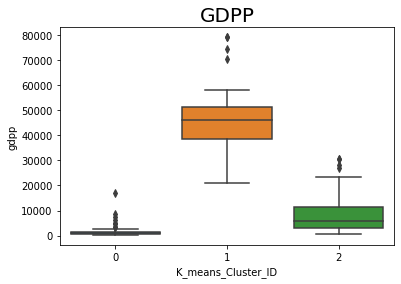

In [32]:
sns.boxplot(x= 'K_means_Cluster_ID' ,y= 'gdpp' ,data = country_df) 
plt.title("GDPP",fontsize = 20)
plt.show()

**Observation** - Cluster 0 has the countries with lower gdpp, followed by Cluster 2 and Cluster 1. 

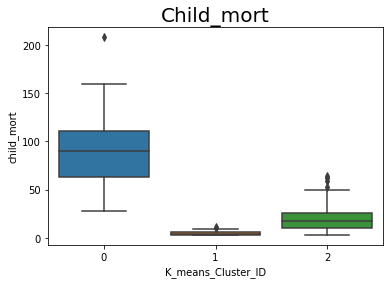

In [33]:
sns.boxplot(x= 'K_means_Cluster_ID' ,y= 'child_mort' ,data = country_df)
plt.title("Child_mort",fontsize = 20)
plt.show()

**Observation** - Cluster 0 has the countries with higher child_mort rate, followed by Cluster 2 and Cluster 1.

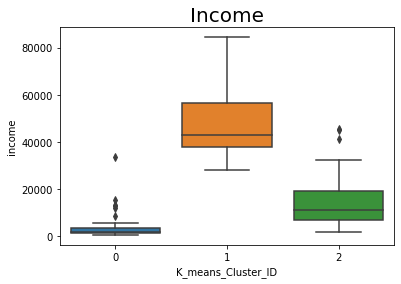

In [34]:
sns.boxplot(x= 'K_means_Cluster_ID' ,y= 'income' ,data = country_df)
plt.title("Income",fontsize = 20)
plt.show()

**Observation** - Cluster 0 has the countries with lower income, followed by Cluster 2 and Cluster 1.

Let us draw the Scatter plot to view the clusters.

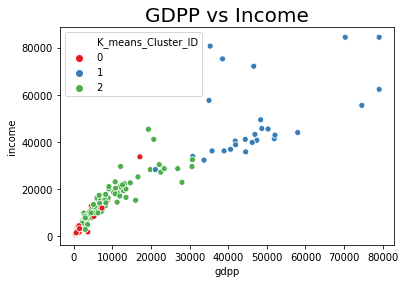

In [35]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'K_means_Cluster_ID', data = country_df, palette ='Set1')
plt.title('GDPP vs Income',fontsize = 20)
plt.show()

**Cluster 0** (red dots) - has lower GDPP and low income

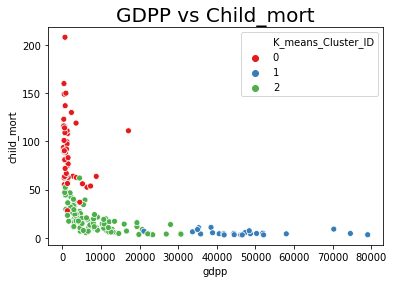

In [36]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'K_means_Cluster_ID', data = country_df, palette ='Set1')
plt.title('GDPP vs Child_mort',fontsize = 20)
plt.show()

**Cluster 0** (red dots) - has lower GDPP and higher child_mort

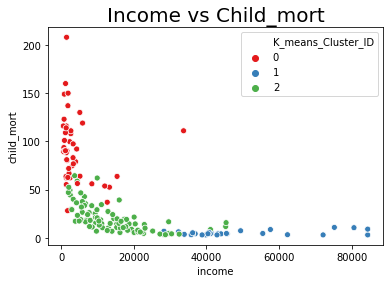

In [37]:
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'K_means_Cluster_ID', data = country_df, palette ='Set1')
plt.title('Income vs Child_mort',fontsize = 20)
plt.show()

**Cluster 0** (red dots) - has lower income and higher child_mort

**Observation** - In **K-means Clustering** approach, based on Profiling, Boxplot and Scatter plots, we have identified that the countries under **'Cluster 0'** are in need of immediate help from the NGO Company. Let us find out the **top 5 countries** from the **'Cluster 0'** which need the immediate attention.

#### Top 5 Countries using K-Means algorithm

In [38]:
country_df[country_df['K_means_Cluster_ID'] == 0][['country','gdpp', 'income','child_mort','K_means_Cluster_ID']].sort_values(['gdpp','income','child_mort'], ascending=[True, True,False]).head()

country   gdpp  income  child_mort  K_means_Cluster_ID
26            Burundi  231.0   764.0        93.6                   0
88            Liberia  327.0   700.0        89.3                   0
37   Congo, Dem. Rep.  334.0   609.0       116.0                   0
112             Niger  348.0   814.0       123.0                   0
132      Sierra Leone  399.0  1220.0       160.0                   0

### 6. Hierarchical Clustering

In [39]:
country_scale_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291549 -0.569622 -0.566956 -0.598740 -0.851668   0.154632   -1.619092   
1   -0.539125 -0.473858 -0.440390 -0.413584 -0.386946  -0.316507    0.647866   
2   -0.272981 -0.424000 -0.486272 -0.476100 -0.221053   0.788529    0.670423   
3    2.007899 -0.381249 -0.534091 -0.463973 -0.612045   1.388160   -1.179234   
4   -0.695826 -0.086742 -0.178410  0.139728  0.125254  -0.606805    0.704258   

   total_fer      gdpp  
0   1.926560 -0.702259  
1  -0.865086 -0.498726  
2  -0.034956 -0.477434  
3   2.154176 -0.530950  
4  -0.543745 -0.032042

In [40]:
country_scale_df.shape

(167, 9)

For the purpose of easy understanding, let us assign the dataframe country_df to Hierarchy_df to perform hierarchical clustering.

In [41]:
Hierarchy_df = country_scale_df
Hierarchy_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291549 -0.569622 -0.566956 -0.598740 -0.851668   0.154632   -1.619092   
1   -0.539125 -0.473858 -0.440390 -0.413584 -0.386946  -0.316507    0.647866   
2   -0.272981 -0.424000 -0.486272 -0.476100 -0.221053   0.788529    0.670423   
3    2.007899 -0.381249 -0.534091 -0.463973 -0.612045   1.388160   -1.179234   
4   -0.695826 -0.086742 -0.178410  0.139728  0.125254  -0.606805    0.704258   

   total_fer      gdpp  
0   1.926560 -0.702259  
1  -0.865086 -0.498726  
2  -0.034956 -0.477434  
3   2.154176 -0.530950  
4  -0.543745 -0.032042

In [42]:
Hierarchy_df.shape

(167, 9)

The shape of the new dataframe Hierarchy_df is same as that of the original dataframe country_df.

Now let us perform single linkage and complete linkage and view the dendrogram. Based on the visualistion we will perform the clustering. 

### Clustering

#### Single Linkage

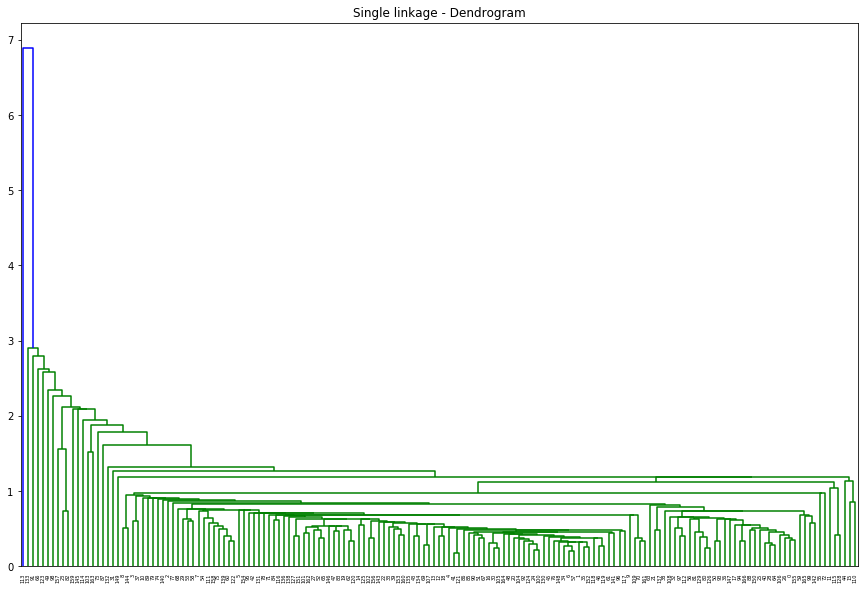

In [43]:
single_link = linkage(Hierarchy_df,method = 'single',metric = 'euclidean')
plt.figure(figsize=(15,10))
dendrogram(single_link)
plt.title('Single linkage - Dendrogram')
plt.show()

The above dendrogram is **not** in the readable format. The reason is that, we are using single linkage method. In single linkage, the distance between 2 clusters is defined as the shortest distance between points in the two clusters. So, the single linkage type produces the dendrograms which are not structured properly. Let us give a try to make clusters using single link.

In [44]:
# 3 clusters
cluster_labels = cut_tree(single_link, n_clusters=3)
cluster_labels = cluster_labels.reshape(-1, )
print("cluster_labels after reshaping",cluster_labels)
print(cluster_labels.shape)

cluster_labels after reshaping [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(167,)


In [45]:
# assign cluster labels
country_df['Hierarchical_cluster_ID'] = cluster_labels
country_df.head()

country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2    55.30   41.92   248.30   1610.0   
1              Albania        16.6  1145.20  267.90  1987.74   9930.0   
2              Algeria        27.3  1712.64  185.98  1400.44  12900.0   
3               Angola       119.0  2199.19  100.60  1514.37   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.66  7185.80  19100.0   

   inflation  life_expec  total_fer     gdpp  K_means_Cluster_ID  \
0       9.44        56.2       5.82    553.0                   0   
1       4.49        76.3       1.65   4090.0                   2   
2      16.10        76.5       2.89   4460.0                   2   
3      22.40        60.1       6.16   3530.0                   0   
4       1.44        76.8       2.13  12200.0                   2   

   Hierarchical_cluster_ID  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [46]:
country_df['Hierarchical_cluster_ID'].value_counts()

0    165
2      1
1      1
Name: Hierarchical_cluster_ID, dtype: int64

**Observation** - Datapoints have not been clustered properly as **165 datapoints (countries)** have been grouped under **cluster 0** and 1 datapoint each into cluster 1 and cluster 2. So, we can move to the **complete linkage**.

Drop the column Hierarchical_cluster_ID before proceeding with complete linkage.

In [47]:
country_df.drop('Hierarchical_cluster_ID',axis = 1,inplace = True)

In [48]:
country_df.head()

country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2    55.30   41.92   248.30   1610.0   
1              Albania        16.6  1145.20  267.90  1987.74   9930.0   
2              Algeria        27.3  1712.64  185.98  1400.44  12900.0   
3               Angola       119.0  2199.19  100.60  1514.37   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.66  7185.80  19100.0   

   inflation  life_expec  total_fer     gdpp  K_means_Cluster_ID  
0       9.44        56.2       5.82    553.0                   0  
1       4.49        76.3       1.65   4090.0                   2  
2      16.10        76.5       2.89   4460.0                   2  
3      22.40        60.1       6.16   3530.0                   0  
4       1.44        76.8       2.13  12200.0                   2

#### Complete Linkage

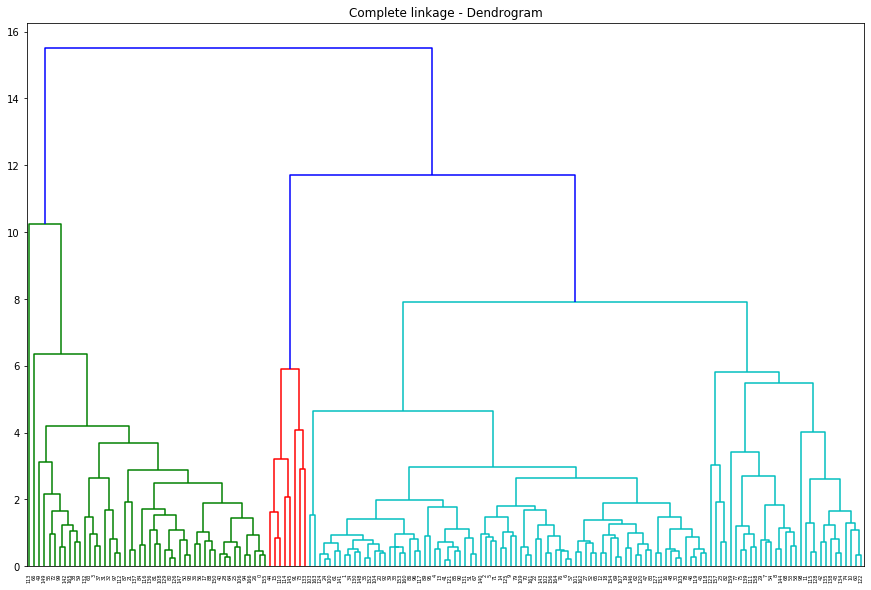

In [49]:
complete_link = linkage(Hierarchy_df,method = 'complete',metric = 'euclidean')
plt.figure(figsize=(15,10))
dendrogram(complete_link)
plt.title('Complete linkage - Dendrogram')
plt.show()

With the complete linkage, we are able to visualise the dendrogram. Let us use this complete_link to perform the clustering. As from **'Elbow-curve/SSD'** and **'Silhouette Score'**, we have identified the optimal value for K as **3**. We will use the same k value and cluster the data.

In [50]:
# 3 clusters
cluster_labels = cut_tree(complete_link, n_clusters=3)
cluster_labels = cluster_labels.reshape(-1, )
print("cluster_labels after reshaping",cluster_labels)
print(cluster_labels.shape)


cluster_labels after reshaping [0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 2 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 2
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 2
 1 0 0 2 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 2 1 1 0 0 1 1 1 1 0 1 1 2 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0]
(167,)


Assigning the `cluster_labels` to the dataframe `country_df`. It will be easy to view the clusters to which the country has been assigned.

In [51]:
# assign cluster labels
country_df['Hierarchical_cluster_ID'] = cluster_labels
country_df.head()

country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2    55.30   41.92   248.30   1610.0   
1              Albania        16.6  1145.20  267.90  1987.74   9930.0   
2              Algeria        27.3  1712.64  185.98  1400.44  12900.0   
3               Angola       119.0  2199.19  100.60  1514.37   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.66  7185.80  19100.0   

   inflation  life_expec  total_fer     gdpp  K_means_Cluster_ID  \
0       9.44        56.2       5.82    553.0                   0   
1       4.49        76.3       1.65   4090.0                   2   
2      16.10        76.5       2.89   4460.0                   2   
3      22.40        60.1       6.16   3530.0                   0   
4       1.44        76.8       2.13  12200.0                   2   

   Hierarchical_cluster_ID  
0                        0  
1                        1  
2                        1  
3                        0  
4                        1

Let us check the dataframe for null values and shape. (Cross-verify as it remains same after concatenation of cluster labels)

In [52]:
country_df.isnull().sum()

country                    0
child_mort                 0
exports                    0
health                     0
imports                    0
income                     0
inflation                  0
life_expec                 0
total_fer                  0
gdpp                       0
K_means_Cluster_ID         0
Hierarchical_cluster_ID    0
dtype: int64

In [53]:
country_df.shape

(167, 12)

In [54]:
country_df['Hierarchical_cluster_ID'].value_counts()

1    111
0     48
2      8
Name: Hierarchical_cluster_ID, dtype: int64

The data points has been distributed into 3 clusters (Hierarchical_cluster_ID) and the sum of all these is 167. <br>So, we have confirmed that no datapoint has been missed out and all the countries have been clustered.

### Profiling

We are doing profiling to identify the countries that have **low gdpp, low income and high child_mort**. 

In [55]:
country_df[['gdpp', 'income', 'child_mort']].groupby(country_df.Hierarchical_cluster_ID).mean()

gdpp        income  child_mort
Hierarchical_cluster_ID                                        
0                         1909.208333   3897.354167   91.610417
1                        14035.783784  19617.693694   17.690090
2                        60097.000000  56321.750000    3.875000

On doing the profiling, we came to know that the countries in the **cluster 0** have **low gdpp,low income and high child_mort**.

#### Visualisation

Let us verify these findings using the boxplots.

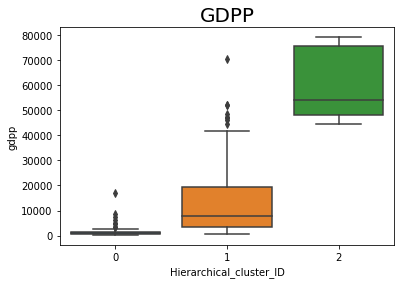

In [56]:
sns.boxplot(x ='Hierarchical_cluster_ID', y = 'gdpp' ,data = country_df)
plt.title("GDPP",fontsize = 20)
plt.show()

**Observation** - Countries with lower gdpp are under the **Cluster 0**, which are followed by **Cluster 1** and **Cluster 2**

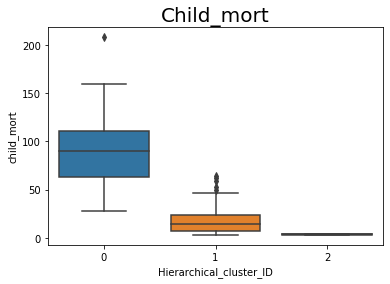

In [57]:
sns.boxplot(x ='Hierarchical_cluster_ID', y = 'child_mort' ,data = country_df)
plt.title("Child_mort",fontsize = 20)
plt.show()

**Observation** - Countries with higher child_mort are under the **Cluster 0**, which are followed by **Cluster 1** and **Cluster 2**

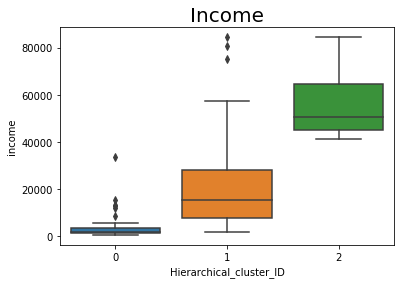

In [58]:
sns.boxplot(x ='Hierarchical_cluster_ID', y = 'income' ,data = country_df)
plt.title("Income",fontsize = 20)
plt.show()

**Observation** - Countries with lower income are under the **Cluster 0**, which are followed by **Cluster 1** and **Cluster 2**

Let us draw the Scatter plot to view the clusters.

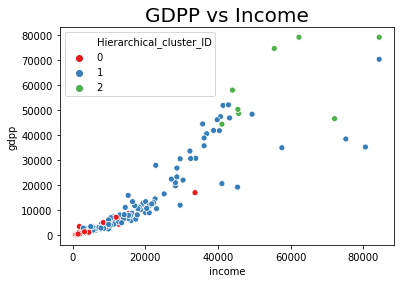

In [59]:
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'Hierarchical_cluster_ID', data = country_df, palette ='Set1')
plt.title('GDPP vs Income',fontsize = 20)
plt.show()

**Observation** - Cluster 0 (red dots) has the countries with lower GDPP and lower income.

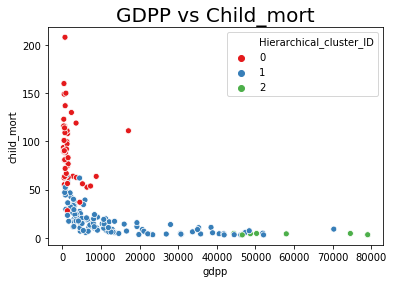

In [60]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'Hierarchical_cluster_ID', data = country_df, palette ='Set1')
plt.title('GDPP vs Child_mort',fontsize = 20)
plt.show()

**Observation** - Cluster 0 (red dots) has countries with higher child_mort and lower gdpp

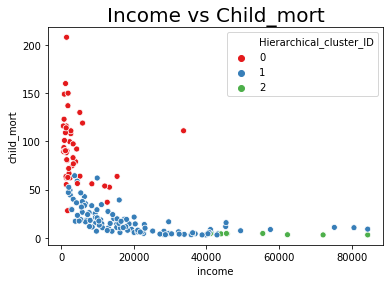

In [61]:
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'Hierarchical_cluster_ID', data = country_df, palette ='Set1')
plt.title('Income vs Child_mort',fontsize = 20)
plt.show()

**Observation** - Cluster 0 (red dots) has countries with higher child_mort and lower income

**Observation** - In **'Hierarchical Clustering'** approach, based on Profiling, Boxplot and Scatter plots, we have identified that the countries under **'Cluster 0'** are in need of immediate help from the NGO Company. Let us find out the top 5 countries from the **'Cluster 0'** which need the immediate attention.

#### Top 5 Countries using Hierarchical clustering algorithm (complete linkage)

In [62]:
country_df[country_df['Hierarchical_cluster_ID'] == 0][['country','gdpp', 'income','child_mort','Hierarchical_cluster_ID']].sort_values(['gdpp','income','child_mort'], ascending=[True, True,False]).head()

country   gdpp  income  child_mort  Hierarchical_cluster_ID
26            Burundi  231.0   764.0        93.6                        0
88            Liberia  327.0   700.0        89.3                        0
37   Congo, Dem. Rep.  334.0   609.0       116.0                        0
112             Niger  348.0   814.0       123.0                        0
132      Sierra Leone  399.0  1220.0       160.0                        0

### Recommendations
Based on the **K-Means clustering** and **Hierarchical Clustering**, the following **5 countries** are in need of immediate help from NGO. <br>

        1. Burundi
        2. Liberia
        3. Congo, Dem. Rep.
        4. Niger
        5. Sierra Leone